In [ ]:
# Install dependencies for this example
# Note: This does not include itk-jupyter-widgets, itself
import sys
!{sys.executable} -m pip install dask toolz scikit-image matplotlib

In [1]:
import numpy as np
import dask.array as da
import dask
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

from itkwidgets import view

This example is based on

  http://matthewrocklin.com/blog/work/2017/01/17/dask-images

In [2]:
sample = skimage.io.imread('http://emdata.janelia.org/api/node/82252/grayscale/raw/xy/400_400/2000_2100_5000')
view(sample)

Viewer(image=<itkImagePython.itkImageUC2; proxy of <Swig Object of type 'itkImageUC2 *' at 0x7f4bf08d1de0> >)

The last number in the URL is an index into a large stack of about 7000 images. We can change that number to get different slices through our 3D dataset.

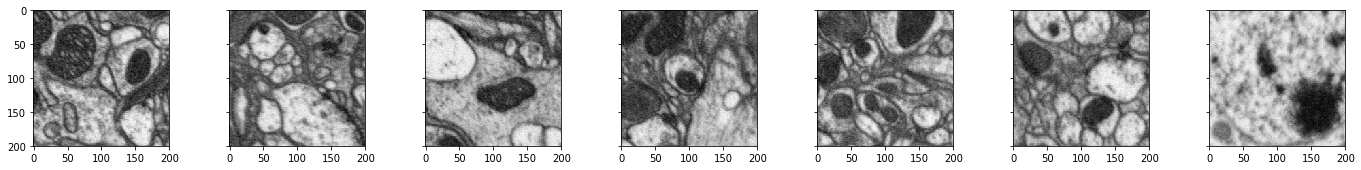

In [3]:
samples = [skimage.io.imread('http://emdata.janelia.org/api/node/82252/grayscale/raw/xy/200_200/3000_3100_%d' % i)
    for i in [2000, 3000, 4000, 5000, 6000, 7000, 8000]]

fig, axarr = plt.subplots(1, 7, sharex=True, sharey=True, figsize=(24, 2.5))
for i, sample in enumerate(samples):
    axarr[i].imshow(sample, cmap='gray')

In [4]:
imread = dask.delayed(skimage.io.imread)  # Lazy version of imread

urls = ['http://emdata.janelia.org/api/node/82252/grayscale/raw/xy/200_200/3000_3100_%d' % i
        for i in range(4000, 4200)]  # A list of our URLs

lazy_values = [imread(url) for url in urls]     # Lazily evaluate imread on each url

arrays = [da.from_delayed(lazy_value,           # Construct a small Dask array
                          dtype=sample.dtype,   # for every lazy value
                          shape=sample.shape)
          for lazy_value in lazy_values]

stack = da.stack(arrays, axis=0)                # Stack all small Dask arrays into one
stack = stack.rechunk((20, 200, 200)) 

The image stack is downloaded on-demand when we visualize it.

In [5]:
view(stack)

Viewer(image=<itkImagePython.itkImageUC3; proxy of <Swig Object of type 'itkImageUC3 *' at 0x7f4bb978ef30> >)